**Diplomado en Inteligencia Artificial y Aprendizaje Profundo**

# Taller Modelo logístico tf.keras

##   <span style="color:blue">Estudiante</span>
Héctor Chica, hachica98@gmail.com

En este taller se reconstrye un modelo predictivo de regresión logística usando los datos de cáncer de la Universidad de Wisconsin del cuaderno creado por los profesores del diplomad0



## Importa módulos

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#
from tensorflow.keras.layers import Dense, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
print(tf.__version__)

2.3.0


## El conjunto de datos cáncer de seno Wisconsin


Puede descargar los datos en [kaggle- cancer de seno-Wisconsin](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)


### Meta-información sobre los datos


1. ID number
2. Diagnosis (M = maligno, B = benigno) 

Se calculan diez características de valor real para cada núcleo celular:

  - radius (media de las distancias desde el centro a los puntos del perímetro) 
  - texture (desviación estándar de los valores de la escala de grises) 
  - perimeter
  - area
  - smoothness (variación local en las longitudes de los radios)
  - compactness (perímetro ^ 2 / área - 1.0) 
  - concavity (severidad de las porciones cóncavas del contorno) 
  - concave points (número de porciones cóncavas del contorno) 
  - symetry 
  - fractal dimension ("aproximación de la línea de costa"
 
La media, el error estándar y el "peor" o el mayor (la media de los tres valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es Radio medio, el campo 13 es Radio SE, el campo 23 es Peor radio.

Todos los valores de las características se recodifican con cuatro dígitos significativos.

datos faltantes: ninguno

Distribución de clases: 357 benignos, 212 malignos




## Lectura de datos

In [24]:
dataset_path = keras.utils.get_file("wisconsin.csv", "https://github.com/deephector/cursoIA")
dataset_path

'C:\\Users\\biome3\\.keras\\datasets\\wisconsin.csv'

### separa entrada (features) y salida 

In [25]:
# Importing data

import os
os.chdir("E:\DOCTORADO UNIVALLE\Doctorado\datos")
os.getcwd()

data = pd.read_csv('wisconsin.csv')
del data['Unnamed: 32']
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


## Preprocesamiento

In [26]:
x = data.iloc[:,2:].values # extrae como tensores numpy
y = data.iloc[:,1].values

### Recodifica la variable objetivo

In [27]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### Divide los datos. Entrenamiento y test

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)


In [29]:
x_train.shape[1]

30

### Normaliza los datos

In [30]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Crea el modelo Sequential modo 2

In [31]:
classifier = keras.Sequential([
layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
layers.Dropout(0.2),
layers.Dense(16, activation='relu'),
layers.Dropout(0.2),
layers.Dense(8, activation='relu'),
layers.Dropout(0.2),
layers.Dense(1,activation='sigmoid')
])

## Compila

In [32]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
classifier.summary()
#plot_model(classifier, to_file='../talleres/cancer_seno.png', 
 #          show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9

## Entrenamiento

In [ ]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150,validation_split = 0.2)

## Predicciones

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

## Matriz de confusión

In [37]:
cm = confusion_matrix(y_test, y_pred)

In [38]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 96.49122807017544%


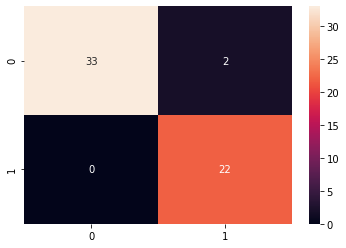

In [39]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

## Evaluación del modelo

In [40]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

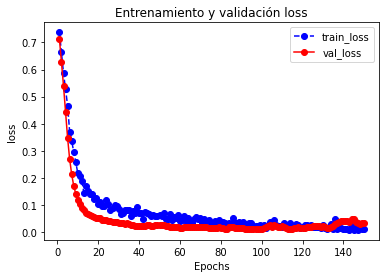

In [41]:
plot_metric(history, 'loss')

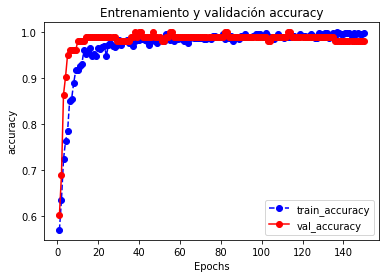

In [42]:
plot_metric(history, 'accuracy')

[Ir al inicio](#Contenido)